## MTH 9879 Market Microstructure Models,    Spring 2015 

<p>

### Lecture 7: Long memory of order flow and market impact

<p>

Jim Gatheral, 
Department of Mathematics   
  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/BaruchLogo2.png" align = "left" width=160></h3>  


<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/MFElogo.png" align = "right" width=100></h3>


$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\cL}{\mathcal{L} }
\newcommand{\cG}{\mathcal{G} }
\newcommand{\Xv}{X^{(v)}}
\newcommand{\s}{\mathcal{S} }
\newcommand{\cE}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$

### Outline of Lecture 7

-   Long memory of order flow

-   Definitions of market impact

-   Why market impact is a concave function of volume.

-   Two models of market impact:

    -   Permanent, state-dependent impact

    -   Transient impact

-   Equivalence of these two models

-   Including limit orders and cancelations



### Long memory of order flow

-   Prices evolve as a function of order flow and the arrival of new
    orders in response to that order flow.

-   Price dynamics (especially dynamics of the mid-quote) are
    well-described by Brownian motion.

-   As we have seen already, order flow is a highly autocorrelated
    long-memory process.
    

-   We know that the price process is reasonably efficient

    -   That is price changes are almost uncorrelated which implies that
        variance grows approximately linearly in trading time.

-   It follows that the market response to order flow must strongly
    depend on the past history of order flow.

### Long memory of order flow

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/Figure1.png" align = "center" width=1000></h2>
if the deal is striken at B1, than sign is -1 else +1.

### Autocorrelation of MSFT trade signs

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

In [2]:
# Compute tradesigns
ts.both <- sign(msft130311.both$signed.shares)
ts.bats <- sign(msft130311.bats$signed.shares)
ts.inet <- sign(msft130311.inet$signed.shares)

# Compute autocorrelation function of trade signs
acts.bats <- acf(ts.bats,plot=F)
acts.inet <- acf(ts.inet,plot=F)
acts.both <- acf(ts.both,plot=F)

# AC computations
lag.bats <- acts.bats$lag[-1]
acf.bats <- acts.bats$acf[-1]

lag.inet <- acts.inet$lag[-1]
acf.inet <- acts.inet$acf[-1]

lag.both <- acts.both$lag[-1]
acf.both <- acts.both$acf[-1]

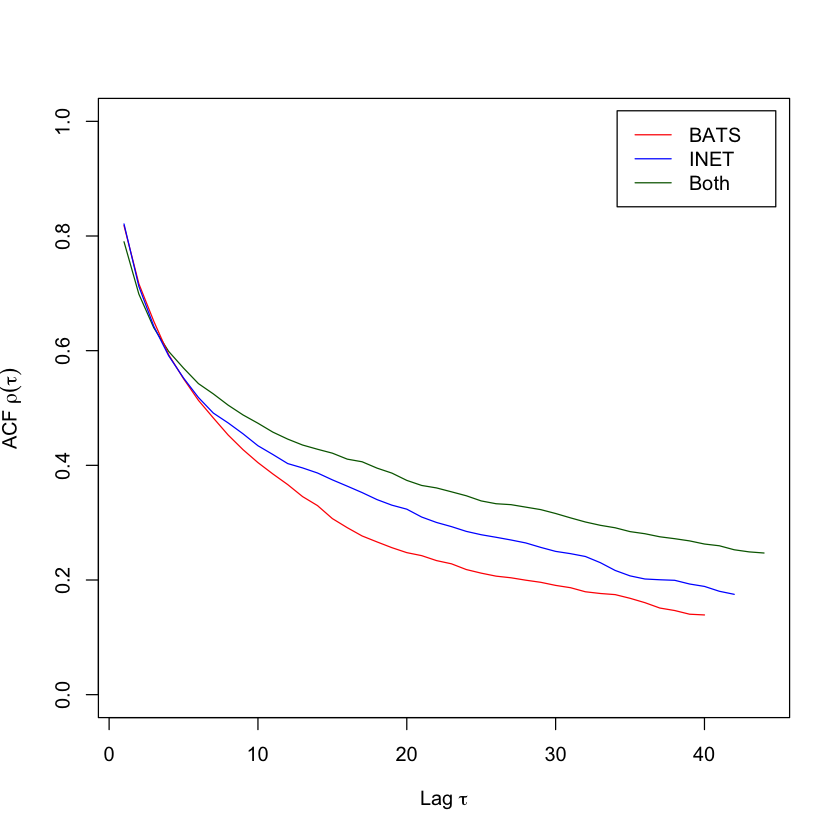

In [3]:
# ACF plot
plot(lag.both,acf.both,type="l",xlab=expression(paste("Lag ",tau)),ylab=expression(paste("ACF ", rho(tau))), col="dark green",ylim=c(0,1))
lines(lag.bats,acf.bats,type="l",xlab="log(lag)",ylab="log(ACF)",col="red")
lines(lag.inet,acf.inet,type="l",xlab="log(lag)",ylab="log(ACF)",col="blue")
legend("topright", c("BATS     ","INET","Both"),col=c("red","blue","dark green"),lty=1, inset=0.02)

Data thanks to Alejandro Cañete is from 11-Mar-2013.

### MSFT autocorrelation log-log plot


Call:
lm(formula = log(acf.both)[2:20] ~ log(lag.both)[2:20])

Coefficients:
        (Intercept)  log(lag.both)[2:20]  
            -0.1399              -0.2696  



Call:
lm(formula = log(acf.bats)[2:20] ~ log(lag.bats)[2:20])

Coefficients:
        (Intercept)  log(lag.bats)[2:20]  
             0.1456              -0.4842  



Call:
lm(formula = log(acf.inet)[2:20] ~ log(lag.inet)[2:20])

Coefficients:
        (Intercept)  log(lag.inet)[2:20]  
           -0.05034             -0.34693  


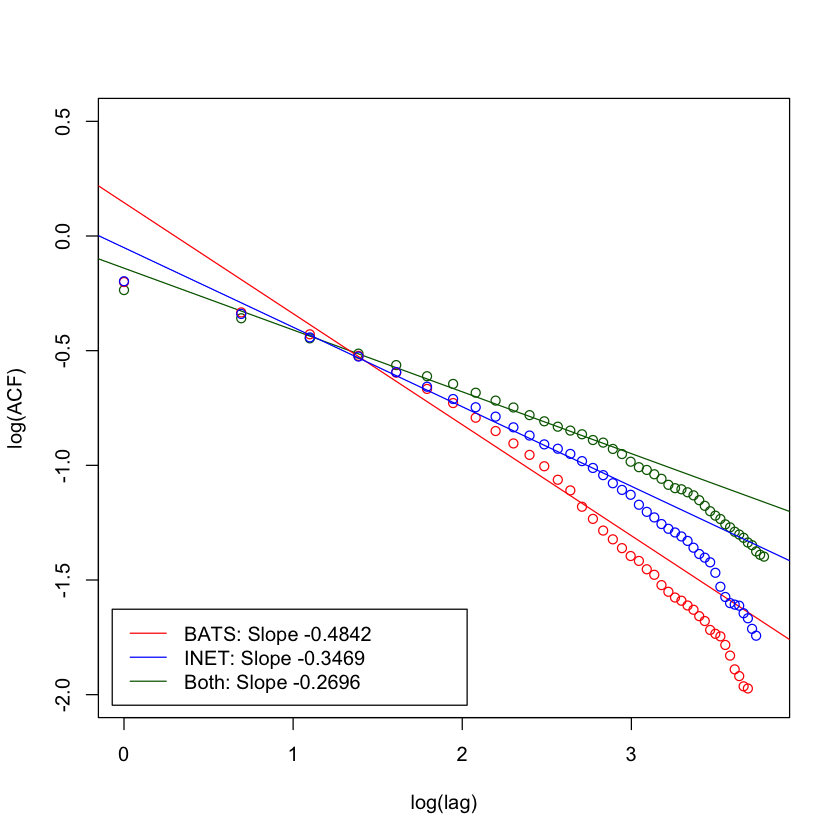

In [4]:
# Log-log plot
plot(log(lag.both),log(acf.both),xlab="log(lag)",ylab="log(ACF)", col="dark green",ylim=c(-2,.5))
(fit.both <- lm(log(acf.both)[2:20]~log(lag.both)[2:20]))
abline(fit.both,col="dark green");
slope.both <- fit.both$coef[2];

points(log(lag.bats),log(acf.bats),xlab="log(lag)",ylab="log(ACF)", col="red")
(fit.bats <- lm(log(acf.bats)[2:20]~log(lag.bats)[2:20]))
abline(fit.bats,col="red");
slope.bats <- fit.bats$coef[2];

points(log(lag.inet),log(acf.inet),xlab="log(lag)",ylab="log(ACF)", col="blue")
(fit.inet <- lm(log(acf.inet)[2:20]~log(lag.inet)[2:20]))
abline(fit.inet,col="blue");
slope.inet <- fit.inet$coef[2];

leg1 <- paste("BATS: Slope",format(slope.bats, digits = 4),"              ")
leg2 <- paste("INET: Slope",format(slope.inet, digits = 4))
leg3 <- paste("Both: Slope",format(slope.both, digits = 4))

legend("bottomleft", c(leg1,leg2,leg3),col=c("red","blue","dark green"),lty=1, inset=0.02)

Data thanks to Alejandro Cañete is from 11-Mar-2013.

### Long memory processes

-   Stochastic processes for which the autocorrelation function decays
    asymptotically as a power-law with an exponent smaller than one are
    called <span>*long-memory*</span> processes.

-   For such a process, $$\rho(\tau) \sim \frac{L(\tau)}{\tau^\alpha}$$
    where $L(\cdot)$ is a slowly-varying function and $\alpha <1$. $\tau$ is the lag term.

    -   $L(x)$ is a slowly varying function if
    
        $$\lim_{x \to \infty}\frac{ L(t\,x)}{L(x)} = 1, \,\forall t.$$

-   Models of long-memory processes include Fractional Brownian Motion
    and ARFIMA (sometimes called FARIMA).

    -   Autoregressive Fractionally Integrated Moving Average

-   Volume and volatility are also both widely believed to be long-memory processes.
    - Though following our work on rough volatility, probably not for much longer!

### ARFIMA

-   A series $\{X_t\}$ is $ARFIMA(p,d,q)$ if the series $(1-B)^d\,X_t$
    is a stationary $ARMA(p,q)$ time series where $B$ is the backward
    shift operator.

-   The special case $d=0$ gives $ARMA(p,q)$ and the case $d=1$ gives
    $ARIMA(p,q)$.


-   $$(1-B)^d=1+\sum_{j=1}^\infty\,\frac{d\,(d-1)...\,(d-j+1)}{j!}\,(-1)^j\,B^j$$


-   When $d< 1/2$, the autocorrelation function
    $$\rho(k)\sim{k^{2\,d-1}}\quad \text{ as } k \to \infty$$



### Unwrapping the definition of ARFIMA

-   An $ARMA(p,q)$ model has the form
    $$X_t=\phi_0+\sum_{i=1}^p\,\phi_{i}\,X_{t-i}+\eta_t-\sum_{j=1}^q\,\theta_j\,\eta_{t-j}$$

-   This can be rewritten using the backshift operator $B$ as
  
  $$\left(1-\sum_{i=1}^p\,\phi_i\,B^i\right) X_t=\phi_0+\left(1-\sum_{j=1}^q\,\theta_j\,B^j\right) \eta_t$$

-   If $X_t$ is $ARIMA(p,q)$ then $Y_t=(1-B) X_t$ is $ARMA(p,q)$. $X_t$
    is then “integrated” $ARMA(p,q)$.

-   If $(1-B)^d X_t$ is $ARMA(p,q)$ with $d \in (-1/2,1/2)$, $X_t$ is
    then “fractionally integrated” $ARMA(p,q)$. Namely: ARFIMA

### The simplest case: $ARFIMA(0,d,0)$

-   In this case, $(1-B)^d\,X_t=\eta_t$.

    -   $d=0$ gives white noise; $d=1$ gives a random walk.


-   Then $X_t$ has the MA representation

    <a name="eq:arfimaMA"></a>(1)
$$x_t=\eta_t+\sum_{j=1}^\infty\,\psi_j\,\eta_{t-j}$$

    $$\text{with }\psi_j=\left(
    \begin{array}{c}j+d-1\\j\end{array}
    \right)=\frac{(j+d-1)\,(j+d-2)...\,d}{j!}$$

-   The ACF of $X_t$ is

    <a name="eq:arfimaACF"></a>(2)
    \begin{eqnarray*}
    \rho(k)&=&\frac{\Gamma(1-2\,d)}{\{\Gamma(1-d)\}^2}\,\frac{d\,(1+d)...\,(k-1+d)}{(1-d)\,(2-d)\,...\,(k-d)}\\
    &\sim&\frac{\Gamma(1-2\,d)}{\Gamma(d)\,\Gamma(1-d)}\,k^{2\,d-1} ~ \text{ as } k \to \infty \nonumber
    \end{eqnarray*}

### Empirical results

-   In an earlier slide, we found $\rho(\tau) \sim \tau^{-\alpha}$ with
    $\alpha \approx 0.6$ for MSFT.

-   Lillo and Farmer found $\alpha \approx 0.6$ on the LSE.

-   Bouchaud et al. found $\alpha \in (0.2,0.7)$ for stocks on the Paris
    Stock Exchange.


-   Note that estimating $\alpha$ as we just did by fitting a straight
    line in a log-log plot of the autocorrelation function is
    notoriously inaccurate. Much more dependable techniques are
    available.



### Explanations for long-memory

There are two main explanations:

-   Herding behavior by traders.

    -   We saw previously that herding can be optimal strategic
        behavior. Buy orders follow buy orders etc.

    -   There can be two types of herding:

        -   Traders respond in the same way to public information.

        -   Some traders copy other traders.

-   Splitting of large trades.

    -   At any given time, there is insufficient depth in the order book
        to accommodate a large trade. Such trades need to be split.

    -   This is also consistent with the optimal strategy of the
        informed trader in the Kyle model.

-   [Tóth, Lillo et al.]<sup id="cite_ref-TothLillo" class="reference"><a href="#cite_note-TothLillo"><span>[</span>9<span>]</span></a></sup>
 argue convincingly that the dominant effect is
    order-splitting.

### Order splitting

-   We call a large order that is yet to be revealed to the market a
    <span>*hidden*</span> order or a <span>*metaorder*</span>.

    -   The trader knows his intentions but others in the market do not.

    -   The objective of the trader is to minimize market impact by
        hiding his intentions for as long as possible.


-   Large institutional trades such as pension fund manager transitions
    often take a matter of weeks to complete.



### A simple model for order splitting

In this model from [Lillo, Mike and Farmer]<sup id="cite_ref-LilloMikeFarmer" class="reference"><a href="#cite_note-LilloMikeFarmer"><span>[</span>6<span>]</span></a></sup>,



-   There are $N$ meta orders in the market whose sizes $V_i$ are drawn
    from the distribution $P(V)$.

-   Meta order signs $\epsilon_i$ are randomly chosen.

-   At time $t$, an existing order $i$ is chosen with uniform
    probability and one unit is traded so that $$V_i(t+1)=V_i(t)-1.$$

    -   This generates a child order of size $1$ and sign
        $\epsilon_i$.

-   A meta order dies if $V_i(t+1)=0$ in which case a new meta order is
    generated.



### The Lillo, Mike, Farmer model of order splitting

We paraphrase the argument of [Lillo, Mike and Farmer]<sup id="cite_ref-LilloMikeFarmer" class="reference"><a href="#cite_note-LilloMikeFarmer"><span>[</span>6<span>]</span></a></sup>:

-   Let $\epsilon_t$ be the sign of the child order observed at time
    $t$. Consider the autocorrelation function
    $\rho(\tau)=\langle \epsilon_t\,\epsilon_{t+\tau} \rangle$ of order
    signs.

-   By assumption, if two child orders come from different metaorders,
    their order signs are uncorrelated.

-   The probability that a child order drawn at random comes from a
    metaorder of length $L$ is proportional to $L\,p(L)$ where $p(L)$ is
    the probability that a metaorder has length $L$.

-   Conditioning on metaorder length $L$, we may then write

    $$\rho(\tau)=\frac{1}{\bar L}\,\sum_{L=1}^\infty\,L\,p(L)\,q(\tau|L)$$
    
    where $q(\tau|L)$ is the probability that two child orders $\tau$
    apart come from the same metaorder of length $L$.

### Heuristic derivation of $q(\tau|L)$

-   We have $$q(\tau|L) = \frac 1 N \,w(L,\tau)$$ where $w(L,\tau)$ is
    the probability that a given order of length $L$ is still active
    after time $\tau$.

-   If child orders are executed in strict rotation, an order of
    remaining length $\ell$ will remain active for roughly $\ell\,N$
    periods.

-   After time $\tau$, only orders of remaining length
    $\ell \geq \tau/N$ will remain active.

-   Thus
    $$w(L,\tau) = \frac 1 L \, \sum_{\ell=\tau/N}^{L-1} 1 = \frac 1 L \, \left(L-1 - \frac{\tau}{N}\right)^+$$
    and so
    $$q(\tau|L)=\frac 1N\, w(L,\tau) \approx \frac 1N\,  \frac 1 L \, \left(L-1 - \frac{\tau}{N}\right)^+.$$

### Computation of $\rho(\tau)$

Then

<a name="eq:acf"></a>(3)
\begin{eqnarray*}
\rho(\tau) &=& \frac{1}{\bar L}\,\sum_{L=1}^\infty\,L\,p(L)\,q(\tau|L)\nonumber\\
&\approx &\frac{1}{\bar L}\, \int_0^\infty\,p(L)\,\frac 1N\,  \left(L-1 - \frac{\tau}{N}\right)^+\,dL\nonumber\\
&=&\frac{1}{\bar L}\, \int_{1+\tau/N}^\infty\,\frac 1N\, \left(L-1 - \frac{\tau}{N}\right) \,p(L)\,dL.\end{eqnarray*}



### The power-law case

In the realistic case where metaorder sizes $L$ are power-law
distributed with $$p(L) =\gamma  L^{-(1+\gamma)},$$

performing the
integration [(3)](#eq:acf) explicitly gives


$$\rho(\tau) =N^{\gamma -2} (N+\tau )^{1-\gamma } \sim\left\{\begin{array}{cc}
  1/N & \text{ if } \tau \ll N \\ 
N^{\gamma -2} \,\tau^{1-\gamma }  &  \text{ if } \tau \gg N .
\end{array}\right.$$ 

In particular, if $\gamma=3/2$ as is more or less
the case empirically for many stocks, we have
$$\rho(\tau) \sim \frac{1}{\sqrt{\tau}} \text{ for large } \tau.$$

-   The LMF model gives a link between the distribution of order sizes
    and the autocorrelation function of order signs.

### Empirical confirmation

-   [Tóth, Lillo et al.]<sup id="cite_ref-TothLillo" class="reference"><a href="#cite_note-TothLillo"><span>[</span>8<span>]</span></a></sup> perform a careful analysis of order flow data from the
    London Stock Exchange containing exchange membership identifiers.

-   They conclude that order splitting is indeed the dominant cause of
    the long memory of the order sign process.



### Evidence based on membership codes

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/Figure2.png" align = "center" width=1000></h2>
<a name="fig2"></a>

### Evidence based on membership codes

-   Assuming meta orders are executed using only a few brokers, we would
    expect to see more autocorrelation for a given broker order flow
    that for order flow in aggregate.

-   [Figure 2](#fig2) from [Bouchaud, Farmer, Lillo]<sup id="cite_ref-BouchaudFarmerLillo" class="reference"><a href="#cite_note-BouchaudFarmerLillo"><span>[</span>2<span>]</span></a></sup> shows just that and is strong
    evidence for order splitting being the dominant cause of long memory
    in order flow.



### More evidence for order splitting

[Tóth, Lillo et al.]<sup id="cite_ref-TothLillo" class="reference"><a href="#cite_note-TothLillo"><span>[</span>8<span>]</span></a></sup> present even more convincing evidence for order-splitting as
opposed to herding as the principal explanation for the long memory of
order flow.

They decompose the sample autocorrelations as follows:

-   $\epsilon^i_t = 1$ means a buy order was placed by investor $i$

-   $\epsilon^i_t = 0$ means an order placed by another investor

-   $\epsilon^i_t =-1$ means a sell order placed by investor $i$.



### Decomposition of autocorrelation function

Assuming the long-term average order sign is zero, we have

$$C(\tau)=\langle\epsilon_t\,\epsilon_{t+\tau}\rangle=\frac{1}{N}\,\sum_t\,\epsilon_{t}\,\epsilon_{t+\tau}
=\frac{1}{N}\,\sum_t\,\sum_{i,j}\epsilon^i_{t}\,\epsilon^j_{t+\tau}$$

Define the autocorrelation between $i$ and $j$ orders as

$$C^{ij}(\tau)=\langle\epsilon^i_{t}\,\epsilon^j_{t+\tau}\rangle=\frac{1}{N^{ij}(\tau)}\,\sum_t\,\epsilon^i_{t}\,\epsilon^j_{t+\tau}$$

and let $\theta^{ij}(\tau) = N^{ij}(\tau)/N$ be the fraction of times
that an order from investor $i$ at time $t$ is followed by an order from
investor $j$ at time $t + \tau$.

Then

\begin{eqnarray*}
C(\tau)&=&\sum_{i,j}\,\theta^{ij}(\tau)\,C^{ij}(\tau)\\
&=&\sum_{i}\,\theta^{ii}(\tau)\,C^{ii}(\tau)+\sum_{i \neq j}\,\theta^{ij}(\tau)\,C^{ij}(\tau)\\
&=:&C_{split}(\tau)+C_{herd}(\tau).\end{eqnarray*}

### Decomposition in pictures

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/TothLilloFigure3.png" align = "center" width=1000></h2>

### Empirical observation

-   Order splitting dominates herding

-   There is <span>*anti-herding*</span>!

    -   Other market participants tend to trade against a split meta
        order.



### Distribution of volume is fat-tailed

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/Figure3.png" align = "center" width=1000></h2>

### The Hill estimator

-   Denote by $\tilde X_{i}$, the $k$ exceedances in the sample
    $\{X_1,X_2,...,X_n\}$ over some threshold $u$.
    

-   The Hill estimator (of $1/\alpha$) is then
    $$H_{k}=\frac{1}{k}\,\sum_{i=1}^k\,\log \frac{\tilde X_{i}}{u}$$
    

-   To see how this works, consider a density of the form

    $$f(x)=\frac{\alpha  }{u}\,\left(\frac{u}{x}\right)^{\alpha +1}.$$
    
    which corresponds to a distribution with tail-exponent $\alpha$.
    Then $$\E\left[\log \frac Xu \right] = \int_u^\infty\,\log \frac{x}{u}\,f(x)\,dx=\frac{1}{\alpha}.$$

-  The Hill estimator is also the maximum likelihood estimator (MLE) for the power law with pdf $f$.


-   The Hill estimator works reasonably well when the tail is really
    Pareto. It can give bad results if the underlying distribution does
    not have a Pareto tail.

### Distribution of volume

-   The distribution of block trades appears to have a tail with
    exponent $\alpha \approx 3/2$.

-   Since block trading is in competition with order-splitting as a
    strategy for executing large trades, we assume that the distribution
    of meta orders should also have a roughly $3/2$ tail.

    -   This has been confirmed recently by [Bershova and Rakhlin]<sup id="cite_ref-BershovaRakhlin" class="reference"><a href="#cite_note-BershovaRakhlin"><span>[</span>1<span>]</span></a></sup> using a
        database of Alliance Bernstein proprietary meta orders.



### Notions of market impact

The term <span>*market impact*</span> can refer to many different
phenomena.

Market impact can refer to:

-   The impact of individual transactions

-   The impact of meta orders

-   The impact of aggregate order flow over a given period of time.



### Market impact of market orders: Empirical results

-   There are many studies in the classic microstructure literature that
    document that market impact is a concave function of volume. Keim
    and Madhavan find that block trades also generate concave market
    impact.


-   On the NYSE, Lillo et al. find that
    $$\mathbb{E} [\Delta P|V] \sim V^\psi$$ with $\psi \approx 0.5$ for
    small $V$ and $\psi \approx 0.2$ for large $V$.

-   On the LSE, Lillo et al. find $\psi \approx 0.3$ on average.


-   Potters and Bouchaud study trades on NASDAQ and the Paris Stock
    Exchange (PSE) finding $
    \mathbb{E} [\Delta P|V] \sim \log V.
    $

### $\psi \approx 0.3$ on LSE from Lillo et al.

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/Figure4.png" align = "center" width=1000></h2>


### The square-root formula

-   Practitioners typically believe in a square-root relationship
    between market impact and volume.


-   Specifically, the relationship between the price impact $\Delta P$
    and the size $Q$ of the order should be something like
    
    $$\Delta P \approx \sigma\,\sqrt{\frac{Q}{V}}$$ 
    
    where $\sigma$ is
    (for example) daily volatility and $V$ is daily volume.

    -   Note that this formula is dimensionally correct.
    
    
- The square root law has recently been verified for Bitcoin and even for vega in options markets.



### A heuristic derivation of the square-root market impact formula

-   <span>Suppose each trade impacts the mid-log-price of the stock by
    an amount proportional to $\sqrt{n_i}$ where $n_i$ is the size of
    the $i$th trade.</span>

-   <span>Then the change in mid-price over one day is given by
    
    $$\Delta P = \sum_i^N\,\eta\,\epsilon_i\,\sqrt{n_i}$$
    
    where $\eta$
    is the coefficient of market impact, $\epsilon_i$ is the sign of the
    $i$th trade and $N$ is the (random) number of trades in a day.
    </span>

    -   <span>Note that both the number of trades and the size of each
        trade in a given time interval are random.</span>

### Derivation continued

-   If $N$, $\epsilon_i$ and $n_i$ are all independent, the variance of
    the one-day price change is given by

    \begin{eqnarray*}
    \sigma^2:=\mbox{Var}(\Delta P)=\eta^2\,\mathbb{E} [N]\,\mathbb{E} [n_i]=\eta^2\,V\end{eqnarray*}

    where $V$ is the average daily volume.


-   <span>It follows that
    $$|\Delta P_i|=\eta\,\sqrt{n_i}=\sigma\,\sqrt{\frac{n_i}{V}}$$ which
    is the familiar square-root market impact formula.</span>



### Why $\sqrt{n}$?

An inventory risk argument:

-   <span>A market maker requires an excess return proportional to the
    risk of holding inventory.</span>

-   <span>Risk is proportional to $\sigma\,\sqrt{T}$ where $T$ is the
    holding period.</span>

-   <span>The holding period should be proportional to the size of the
    position.</span>

-   <span>So the required excess return must be proportional to
    $\sqrt{n}$.</span>



### Gabaix again

-   Volume follows the $3/2$ law:
    $$\mathbb{P}\left[\mbox{Volume} > V\right] \sim \frac{1}{V^{3/2}}$$


-   Market impact is proportional to the square-root of volume
    $$\Delta P \sim \sqrt{V}$$


-   Then $$\mathbb{P}\left[\Delta P > x\right] \sim \frac{1}{x^3},$$ the so-called cubic
    law of returns.



### Aggregate market impact

-   When practitioners are questioned as to whether the square-root
    model is supposed to estimate the impact of individual orders, meta
    orders or aggregate order flow, the answer is usually “all of
    these!”.

-   [Hopman]<sup id="cite_ref-Hopman" class="reference"><a href="#cite_note-Hopman"><span>[</span>5<span>]</span></a></sup> measures aggregate order flow on the LSE as
    $\sum_i\,\epsilon_i\,V_i^\psi$.

    -   He finds that $\psi = 1/2$ best explains daily returns. $\psi=1$
        gives a much lower $R^2$.

    -   He also finds that causality runs from orders to prices and not
        the other way round, supporting the econophysicists and
        contradicting the informed trader story.

-   Gabaix et al. find $\psi \approx 1/2$ on New York, London and Paris
    markets.

### Scaling of aggregated returns

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/Figure5.png" align = "center" width=1000></h2>
<a name="fig5"></a>

### Aggregation

-   For a sequence of $N$ successive trades, let
    $Q_N=\sum_i^N \epsilon_i\,V_i$ be the aggregate quantity and
    $R_N=\sum_i^N\,\log P_i/P_{i-1}$ be the aggregate return.

-   [Figure 5](#fig5) shows how the aggregate return $R(Q,N)$ scales with
    quantity $Q_N$ and $N$.

-   According to [Bouchaud, Farmer, Lillo]<sup id="cite_ref-BouchaudFarmerLillo" class="reference"><a href="#cite_note-BouchaudFarmerLillo"><span>[</span>2<span>]</span></a></sup>, aggregate impact
    becomes increasingly linear with increasing $N$.

    -   Note however that this seems to contradict Hopman.

### Why is market impact concave?

There are three types of answer in the literature

1.  The informativeness of a trade depends on size (Easley and O’Hara).

    -   Small trades may carry almost as much information as large
        trades.

2.  The shape of the order book (Weber and Rosenow).

    -   The cumulative depth available at a given price level determines
        price impact.

3.  Selective liquidity taking.

    -   Traders condition their orders on the quantity available in the
        order book.



### Virtual market impact
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/Figure6.png" align = "center" width=1000></h2>

### Selective liquidity taking

-   Empirically, nearly all trades are of sizes less than or equal to
    the size available at the best quote, and certainly smaller than the
    total size available at the first two quote levels.


-   Suppose then that the price changes only in increments of the spread
    $s$. Then
    $$\mathbb{E} [\Delta P|V]=\Pr(\Delta P >0|V)\,s=\Pr(V \ge Q)\,s$$
    where $Q$ is the quantity available at the best quote.

-   But $$\Pr(V \ge Q)=\Pr(Q \le V)=:F_Q(V),$$
the cumulative
    distribution function of quantity at the best quote, which we expect
    to be concave wrt V.

### Gamma-distributed volume at best quote

For example, according to Bouchaud, Mézard and Potters, the volume at
the best quote is gamma-distributed

$$f(V) \sim V^{\gamma-1}\,e^{-V/V_0}$$ 

with $\gamma \approx 0.75$.

The cumulative distribution would then be
$$F(V)=1-\frac{\Gamma \left(\gamma ,\frac{V}{V_0} \right)}{\Gamma (\gamma)}$$



### Gamma distributed volume at best quote with $\gamma=0.75$

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/FV.png" align = "center" width=600></h2>

The green line is $F(V)$; the red line is $V^{0.5}$; the violet line is
$V^{0.2}$.



### A fixed permanent impact model

-   Suppose that changes in the mid-quote $m$ depend on the sign
    $\epsilon$ of the order, the order size $v$ and possibly on other
    state variables $\Omega$ such as the state of the order book:
    $$\Delta m_t=m_{t}-m_{t-1}=\epsilon_t\,f(v_t,\Omega_t)+\eta_t$$ with
    $\eta$ iid and satisfying $\mathbb{E} [\eta_t]=0$,
    $\mbox{Var}[\eta_t]=\sigma^2$.


-   Integrating this gives
    $$m_{t}=\sum_{k<t}\,\epsilon_k\,f(v_k,\Omega_k)+\sum_{k<t}\,\eta_k$$
    from which we see that in this model, all market impact is
    permanent.



### Variance and autocovariance of price returns

-   If $f(\cdot)$ is independent of order-flow, it follows that

    $$\mathbb{E} [\Delta m_{t}\,\Delta m_{t+\tau}]=\mathbb{E} [\epsilon_{t}\,\epsilon_{t+\tau}\,f(v_t)\,f(v_{t+\tau})]\propto \tau^{-\alpha}$$
    
    so that price returns are autocorrelated in time.


-   Also, in that case, the variance of lag-$\tau$ returns is given by
    $$\mathbb{E} [(m_{t+\tau}-m_t)^2]\propto \sum_{i,j=1}^\tau\,\mathbb{E} \left[\epsilon_i\,\epsilon_j\right]\,f(v_i)\,f(v_j) \propto \tau^{2-\alpha}.$$


-   Both of these properties of the model are inconsistent with
    efficient prices as empirically observed.

-   It follows that either the market impact function $f(\cdot)$ must
    depend on order flow or that market impact is not permanent.

    -   The former point of view was promoted by Farmer, Lillo et al.

    -   The latter point of view was promoted by Bouchaud et al.


-   We will see that, somewhat surprisingly, the two points of view are compatible with each other.

### The Madhavan Richardson and Roomans (MRR) model again

-   In the MRR model, as in Glosten-Milgrom, the revision in beliefs is
    positively correlated with the innovation in the order flow:

    <a name="eq:MRRsurprise"></a>(4)
    $$\Delta V_t=\lambda\,\left(\epsilon_t-\mathbb{E} [\epsilon_t|\mathcal{F} _t]\right) + e_t$$

    where $V_t$ is the efficient price and $e_t$ represents for example
    news.

-   However, in the MRR model, the revision in beliefs depends only on
    the unexpected component of order flow.


-   MRR modeled the order flow as $AR(1)$: $\epsilon_t = \phi_1 \epsilon_{t-1} + \eta_t$.


-   We now model order flow as a long-memory process.

### Expected trade sign

-   In the MRR model,
    $$\mathbb{E} [\epsilon_t|\epsilon_{t-1}]=\phi_1\,\epsilon_{t-1}.$$
    where $\phi_1$ is the first order autocorrelation coefficient.


-   In our extension of this model, we write
    $$\hat \epsilon_t=\mathbb{E} [\epsilon_t|\mathcal{F} _t]=\sum_{k=1}^\infty\,\phi_k\,\epsilon_{t-k}$$
    so the filtration $\mathcal{F} _t$ is now not just the last order
    sign $\epsilon_{t-1}$ but the entire order flow history.

-   In practice, we can fit an $AR(p)$ model with some large order $p$:
    $$\hat \epsilon_t=\mathbb{E} [\epsilon_t|\mathcal{F} _t]=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.$$


-   We expect the coefficients to decay as a power-law:
    $$\phi_{k}\sim k^{-\beta} \text{ for some $\beta$.}$$

### Market impact relates to unexpected order flow
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/Figure10.png" align = "center" width=1000></h2>
<a name="fig10"></a>

prejecting buying and it turns out to be buying, than the price impact is minor.

### Empirical verification of the model

-   Approximating $\Delta V$ by $\Delta m$, we may rewrite [(4)](#eq:MRRsurprise) as

    <a name="eq:MRRe"></a>(5)
    $$\Delta m_{t}=\lambda\,\left(\epsilon_t-\hat \epsilon_t\right)+\eta_t$$


-   In this model, the impact of a transaction depends on the entire
    history of the order flow and how predictable the order sign of the
    transaction is.

    -   The most likely outcome has the smallest impact.


-   In [Figure 10](#fig10), we see stunning empirical verification of this model.



### Bouchaud’s power-law decay argument

-   <span> As before, assume that over one day
    $$\Delta P = \sum_i^N\,\eta\,\epsilon_i\,\sqrt{n_i}$$</span>

-   <span>The previous heuristic proof of the square-root model assumed
    that $\mbox{Cov}[\epsilon_i,\epsilon_j]=0$ if $i \neq j$ and that all
    market impact is permanent. </span>

-   <span> Empirically, we found that autocorrelation of trade signs
    shows power-law decay with a small exponent $\alpha$ (very slow
    decay).</span>



### Bouchaud’s power-law decay argument continued

\begin{eqnarray*}
\mbox{Var}[\Delta P] &=& \eta^2\,\mbox{Var}\left[\sum_i^N\,\epsilon_i\,\sqrt{n_i}\right]\\
&=&\eta^2\,\left\{N\,\mbox{Var}[\sqrt{n_i}]+\sum_{i \neq j}\,n_i\,n_j\mbox{Cov}[\epsilon_i,\epsilon_j]\right\}\\
&\approx& \eta^2\,\left\{N\,\mbox{Var}[\sqrt{n_i}]+\frac{2\,C_1}{(2-\alpha)\,(1-\alpha)}\,\mathbb{E} [\sqrt{n}]^2\,N^{2-\alpha}\right\}\\
&\sim& N^{2-\alpha} \textrm{ as } N \to \infty\end{eqnarray*}

-   <span>Empirically, we find that, to a very good approximation,
    $\mbox{Var}[\Delta P] \propto N$.</span>

    -   <span>Otherwise returns would be serially correlated.</span>

-   <span>These observations may be reconciled if market impact decays
    as a power law.</span>

### Computation of daily variance with power-law decay

-   Assuming market impact decays as $1/\tau^{\gamma}$, we have

$$
\begin{eqnarray*}
    \mbox{Var}[\Delta P] &=& \eta^2\,\mbox{Var}\left[\sum_i^N\,\frac{\epsilon_i\,\sqrt{n_i}}{(N-i)^{\gamma}}\right]\\
    &=&\eta^2\,\left\{\sum_i^{N-1}\,\frac{\mathbb{E} [n]}{(N-i)^{2\,\gamma}} \\  + 2\,C_1\, \sum_{i=1}^{N-1}\,\sum_{j=i+1}^{N-1}\frac{\mathbb{E} [\sqrt{n}]^2}{(N-i)^{\gamma}\,(N-j)^{\gamma}\,(j-i)^{\alpha}}\right\}\\
    &\sim& N^{2-\alpha-2\,\gamma} \textrm{ as } N \to \infty\\
    & \sim & N \textrm{ only if } \gamma \approx (1-\alpha)/2.\end{eqnarray*}
$$


### Equivalence of the two formulations

We have in the Lillo picture that

<a name="eq:dm1"></a>(6)
$$\Delta m_t=m_t-m_{t-1}=\lambda\,\left(\epsilon_t-\hat \epsilon_t\right)+\eta_t$$

with $$\hat \epsilon_t=\sum_{k=1}^\infty\,\phi_k\,\epsilon_{t-k}.$$

Write (Bouchaud picture)
$$m_t=\lambda\,\sum_{i=0}^\infty\,G(i)\,\epsilon_{t-i}+\sum_{j \leq t}\,\eta_j$$
Then

<a name="eq:dm2"></a>(7)
\begin{eqnarray*}
m_t-m_{t-1}&=&\lambda\,\left(\sum_{k=0}^\infty\,G(k)\,\epsilon_{t-k}-\sum_{k=0}^\infty\,G(k)\,\epsilon_{t-1-k}\right)+\eta_t\nonumber\\
&=&\lambda\,\epsilon_t+\lambda\,\sum_{k=1}^\infty\,\left\{G(k)-G(k-1)\right)\}\,\epsilon_{t-k}+\eta_t
\end{eqnarray*}

To match the expressions [(6)](#eq:dm1) and [(7)](#eq:dm2), we need $$G(k)-G(k-1)=-\phi_k.$$ One
choice that would work is: $$G(k)=\sum_{j=k+1}^{\infty}\,\phi_j$$ If the
autocorrelation function $\rho(\tau) \sim \tau^{-\alpha}$ for large
$\tau$, and if the underlying process for order signs is ARFIMA, the
best linear predictor of order sign is given by
$$\hat \epsilon_t=\sum_{k=1}^\infty\,\phi_k\,\epsilon_{t-k}$$ with
$\phi_k \sim k^{-(1+\beta)}$ for large $k$ and
$$\beta=\frac{1-\alpha}{2}.$$

Then, for large $k$,
$$G(k)=\sum_{j=k+1}^{\infty}\,\phi_j \sim \frac{1}{k^\beta}$$ with

$$\beta=\frac{1-\alpha}{2}.$$ 

That is, the propagator $G(\tau)$ decays
as $\tau^{-\gamma}$ with 

$$\gamma=\frac{1-\alpha}{2}.$$ 

as required to
show equivalence between the Bouchaud and Lillo pictures.

### Explicit computation 

Suppose the order sign process is $ARFIMA(0,d,0)$. Then, by definition,
$$(1-B)^d \epsilon_t=\eta_t$$ where $\eta_t \sim N(0,1)$ say.

Inverting this expression gives

<a name="eq:epsilonEta"></a>(8)
$$\epsilon_t=\eta_t+\sum_{j=1}^\infty\,\psi_j\,\eta_{t-j}=\sum_{j=0}^\infty\,\psi_j\,\eta_{t-j}$$

where we adopt the convention that $\psi_0=1$ and for $j>0$,

$$\psi_j=(-1)^j\,\left(
\begin{array}{c}-d\\j\end{array}\right)
=\frac{d\,(d+1)...\,(d+j-1)}{j!}
=\left(
\begin{array}{c}j+d-1\\j\end{array}\right)
$$

The autocovariance function of $\epsilon_t$ is then

<a name="eq:arfimaACF"></a>(9)
\begin{eqnarray*}
\rho(k)&=&\sum_{j=0}^\infty\,\psi_j\,\psi_{j+k}\nonumber\\
&=&\frac{\Gamma(1-2\,d)}{\{\Gamma(1-d)\}^2}\,\frac{d\,(1+d)...\,(k-1+d)}{(1-d)\,(2-d)\,...\,(k-d)}\nonumber\\
&\sim&\frac{\Gamma(1-2\,d)}{\Gamma(d)\,\Gamma(1-d)}\,\frac{1}{k^{1-2\,d}} ~ \text{ as } k \to \infty
\end{eqnarray*}

In our notation, $\rho(\tau) \sim \tau^{-\alpha}$ so
$d=\frac{1-\alpha}{2}$.

Now invert [(8)](#eq:epsilonEta) to get
$$\epsilon_t=\eta_t+\sum_{j=1}^\infty\,(-1)^{j-1}\,\left(
\begin{array}{c}d\\j
\end{array}
\right)\,\epsilon_{t-j}.$$

Then


$$\hat \epsilon_t=\mathbb{E} [\epsilon_t|\mathcal{F} _t]=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}. \text{ with }
\phi_k=(-1)^{j-1}\,\left(
\begin{array}{c}d\\j
\end{array}
\right).$$ 

Finally

$$G(k)=\sum_{j=k+1}^\infty\,\phi_j=\left(
\begin{array}{c}k-d\\k
\end{array}
\right)\sim \frac{1}{\Gamma(1-d)\,k^d} \text{ as } k \to \infty.$$

Thus,
the exponent $\gamma$ of decay of market impact is given by

$$\gamma=d=\frac{1-\alpha}{2}.$$

<font color="red">The Bouchaud and Lillo formulations are exactly equivalent in this case.

### When is TIM equivalent to HDIM?

- [Taranto et al.]<sup id="cite_ref-Taranto" class="reference"><a href="#cite_note-Taranto"><span>[</span>8<span>]</span></a></sup> show that the Bouchaud transient impact (TIM) picture is equivalent to the Lillo-Farmer history dependent impact (HDIM) picture whenever the time series of order signs is generated by a so-called Discrete Autoregressive (DAR) process.


- A DAR process may be constructed as follows:
    - For each $t$, choose a distance $\ell >0$ with probability $\lambda_\ell$ from a distribution with $\sum_\ell \lambda_\ell=1$.
    - Then 
    $$
    \epsilon_t = \left\{\begin{array}{ll}\epsilon_{t-\ell}&\text{ with probability } \rho\\
    -\epsilon_{t-\ell}&\text{ with probability } 1-\rho\end{array}\right.
    $$

### Including other events

Start with the Bouchaud transient impact (TIM) picture again:

$$p_t=\lambda\,\sum_{s<t}\,[G(t-s)\,\epsilon_s +\eta_s]+p_{-\infty}.$$
The <span>*propagator*</span> or <span>*decay kernel*</span> $G(\cdot)$
may be estimated from the correlation function

\begin{eqnarray*}
\mathcal{R} (\ell)&=&\langle (p_{t+\ell}-p_t)\,\epsilon_t  \rangle\\
&=&\sum_{0 < n \leq \ell}\,G(n)\,C(\ell - n) + \sum_{n>0}\left[G(n + \ell) - G(n)\right]\,C(n).\end{eqnarray*}

Then, the second moment of the price difference (variance) may be
computed as $$\mathcal{D} (\ell)=\langle (p_{t+\ell}-p_t)^2\rangle.$$



### Bouchaud transient impact picture vs observation

[Eisler, Bouchaud and Kockelkoren]<sup id="cite_ref-EislerEtAl" class="reference"><a href="#cite_note-EislerEtAl"><span>[</span>4<span>]</span></a></sup> show that the Bouchaud transient impact (TIM) picture is 
incomplete.

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/EislerEtAlFigure1.png" align = "center" width=1000></h2>

### Interpretation

The Bouchaud picture is too simplistic

-   Market impact varies wildly over time according to the state of the
    market (for example the shape of the order book)

    -   The history of order flow is not the only determinant of market
        impact

-   Not only market orders impact the market price; limit orders and
    cancelations also impact the price.



### Summary

-   Order flow is a long memory process.

    -   The dominant effect is order-splitting.

-   Market impact is concave due to selective liquidity taking.

-   Market impact of market orders can be modeled as:

    -   Permanent but state-dependent (Lillo)

    -   Transient (Bouchaud)

-   Both of these formulations are equivalent.

-   To get quantitative (as opposed to qualitative) agreement with
    observation, in principle we need to take into account

    -   Time-varying liquidity

    -   Limit orders and cancelations
     
-  In practice, it seems (see [Taranto et al.]<sup id="cite_ref-Taranto" class="reference"><a href="#cite_note-Taranto"><span>[</span>8<span>]</span></a></sup>) that distinguishing between market orders that change the price and orders that result in no price change is enough for a surprisingly accurate description of market impact.

### References
<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-BershovaRakhlin"><span class="mw-cite-backlink"><b><a href="#cite_ref-BershovaRakhlin">^</a></b></span>Nataliya Bershova and Dmitry Rakhlin, The
Non-Linear Market Impact of Large Trades: Evidence from Buy-Side Order
Flow, <span>*Quantitative Finance*</span> <span>**13**</span>(11)
1759–1778 (2013). 
  </li>

  <li id="cite_note-BouchaudFarmerLillo"><span class="mw-cite-backlink"><b><a href="#cite_ref-BouchaudFarmerLillo">^</a></b></span>Jean-Philippe Bouchaud, J. Doyne Farmer, and
Fabrizio Lillo, How Markets Slowly Digest Changes in Supply and Demand,
in <span>*Handbook of Financial Markets: Dynamics and Evolution*</span>
57–156. (2009) available at
http://tuvalu.santafe.edu/%7Ejdf/papers/MarketsSlowlyDigest.pdf:
Sections 4, 5 and 6. 
  </li>
    
  <li id="cite_note-BouchaudEtAl"><span class="mw-cite-backlink"><b><a href="#cite_ref-BouchaudEtAl">^</a></b></span>Jean-Philippe Bouchaud, Yuval Gefen, Marc Potters and Matthieu Wyart, Fluctuations and response in financial markets: the subtle nature of random price changes, <span>*Quantitative Finance*<span> <span>**4**</span>(2) 176--190 (2004). 
  </li>
  
  <li id="cite_note-EislerEtAl"><span class="mw-cite-backlink"><b><a href="#cite_ref-EislerEtAl">^</a></b></span>Zoltán Eisler, Jean-Philippe
Bouchaud, and Julien Kockelkoren, The price impact of order book events: market orders, limit orders and cancellations, *Quantitative Finance* **12**(9) 1395-1419 (2012).
  </li>
  

  
  <li id="cite_note-Hopman"><span class="mw-cite-backlink"><b><a href="#cite_ref-Hopman">^</a></b></span>Carl Hopman, Do supply and demand drive stock prices?,
<span>*Quantitative Finance*</span> <span>**7**</span>(1) 37–53 (2007). 
  </li>
  
  <li id="cite_note-LilloMikeFarmer"><span class="mw-cite-backlink"><b><a href="#cite_ref-LilloMikeFarmer">^</a></b></span>Fabrizio Lillo, Szabolcs Mike, and J Doyne
Farmer, Theory for long memory in supply and demand, <span>*Phys. Rev.
E*</span> <span>**71**</span>(6) 66122 (2005). 
  </li>
  
  <li id="cite_note-SadTaqqu"><span class="mw-cite-backlink"><b><a href="#cite_ref-SadTaqqu">^</a></b></span>Gennady Samorodnitsky, Murad S. Taqqu,
<span>*Stable non-Gaussian random processes: stochastic models with
infinite variance*</span>, Chapman and Hall (1994). 
  </li>
  
<li id="cite_note-Taranto"><span class="mw-cite-backlink"><b><a href="#cite_ref-Taranto">^</a></b></span>  Damian Eduardo Taranto, Giacomo Bormetti, Jean-Philippe Bouchaud, Fabrizio Lillo, and Bence Toth, Linear models for the impact of order flow on prices I. Propagators: Transient vs. History Dependent Impact, arXiv preprint arXiv:1602.02735  (2016)
</li>
  
  <li id="cite_note-TothLillo"><span class="mw-cite-backlink"><b><a href="#cite_ref-TothLillo">^</a></b></span>Bence Tóth, Imon Palit, Fabrizio Lillo, and J Doyne
Farmer, Why is order flow so persistent?, <span>*Journal of Economic Dynamics and Control*</span> (51) 218-239 (2015). 
  </li>
  
</ol>